## Imports
All of the IceVision components can be easily imported with a single line.


In [1]:
from icevision.all import *

### Creating a model
Selections only take two simple lines of code. For example, to try the mmdet library using the retinanet model and the resnet50_fpn_1x backbone  could be specified by:
```
model_type = models.mmdet.retinanet
backbone = model_type.backbones.resnet50_fpn_1x(pretrained=True)
```
As pretrained models are used by default, we typically leave this out of the backbone creation step.

We've selected a few of the many options below. You can easily pick which option you want to try by setting the value of `selection`. This shows you how easy it is to try new libraries, models, and backbones.


In [2]:
# Just change the value of selection to try another model

selection = 0


extra_args = {}

if selection == 0:
  model_type = models.mmdet.retinanet
  backbone = model_type.backbones.resnet50_fpn_1x

elif selection == 1:
  # The Retinanet model is also implemented in the torchvision library
  model_type = models.torchvision.retinanet
  backbone = model_type.backbones.resnet50_fpn

elif selection == 2:
  model_type = models.ross.efficientdet
  backbone = model_type.backbones.tf_lite0
  # The efficientdet model requires an img_size parameter
  extra_args['img_size'] = image_size

elif selection == 3:
  model_type = models.ultralytics.yolov5
  backbone = model_type.backbones.small
  # The yolov5 model requires an img_size parameter
  extra_args['img_size'] = image_size

model_type, backbone, extra_args

(<module 'icevision.models.mmdet.models.retinanet' from '/home/ubuntu/miniconda3/lib/python3.8/site-packages/icevision/models/mmdet/models/retinanet/__init__.py'>,
 {})


Now it is just a one-liner to instantiate the model. If you want to try another *option*, just edit the line at the top of the previous cell.

In [3]:
# Instantiate the mdoel
# if mmdet.retinanet is selected above there will be some warnings but still works well
model = model_type.model(backbone=backbone(pretrained=True), num_classes=91, **extra_args)


/home/ubuntu/miniconda3/lib/python3.8/site-packages/mmcv/cnn/utils/weight_init.py:118: UserWarning: init_cfg without layer key, if you do not define override key either, this init_cfg will do nothing
  warnings.warn(


Use load_from_local loader
The model and loaded state dict do not match exactly

size mismatch for bbox_head.retina_cls.weight: copying a param with shape torch.Size([720, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([810, 256, 3, 3]).
size mismatch for bbox_head.retina_cls.bias: copying a param with shape torch.Size([720]) from checkpoint, the shape in current model is torch.Size([810]).


## Load Model

In [4]:
PATH = 'model-car.mm'
model.load_state_dict(torch.load(PATH))
model.eval()


RetinaNet(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
         

### Prediction

Sometimes you want to have more control than `show_results` provides. You can construct an inference dataloader using `infer_dl` from any IceVision dataset and pass this to `predict_dl` and use `show_preds` to look at the predictions.

A prediction is returned as a dict with keys: `scores`, `labels`, `bboxes`, and possibly `masks`. 

Prediction functions that take a `detection_threshold` argument will only return the predictions whose score is above the threshold.

Prediction functions that take a `keep_images` argument will only return the (tensor representation of the) image when it is `True`. In interactive environments, such as a notebook, it is helpful to see the image with bounding boxes and labels applied. In a deployment context, however, it is typically more useful (and efficient) to return the bounding boxes by themselves.



> NOTE: For a more detailed look at inference check out the [inference tutorial](https://airctic.com/dev/inference/)

In [5]:
dataset_dir = './coco-2017-car'
annot = dataset_dir + '/train/labels.json'
img_dir = dataset_dir  + '/train/data'
# COCO parser: provided out-of-the-box
parser = parsers.COCOBBoxParser(annotations_filepath=annot, img_dir=img_dir)
infer_records, valid_records = parser.parse(RandomSplitter([1.0, 0.0]))

INFO     - Autofixing records | icevision.parsers.parser:parse:136



[     0.6271     0.52253     0.78651     0.78662     0.58547     0.56825      0.5005     0.62048]
['person', 'person', 'sandwich', 'chair', 'chair', 'chair', 'chair', 'dining table']
[<BBox (xmin:253.07052612304688, ymin:48.77934646606445, xmax:272.9587707519531, ymax:91.30961608886719)>, <BBox (xmin:0.38457679748535156, ymin:46.974822998046875, xmax:47.155975341796875, ymax:138.35885620117188)>, <BBox (xmin:72.10161590576172, ymin:163.0528564453125, xmax:209.81729125976562, ymax:252.55496215820312)>, <BBox (xmin:76.66185760498047, ymin:56.408607482910156, xmax:205.87551879882812, ymax:145.61370849609375)>, <BBox (xmin:296.4044189453125, ymin:48.366920471191406, xmax:335.1517333984375, ymax:94.70951080322266)>, <BBox (xmin:47.714908599853516, ymin:47.78433609008789, xmax:156.15513610839844, ymax:140.41265869140625)>, <BBox (xmin:340.58184814453125, ymin:51.954349517822266, xmax:381.41998291015625, ymax:99.6209716796875)>, <BBox (xmin:0.0, ymin:132.91131591796875, xmax:375.006591796875

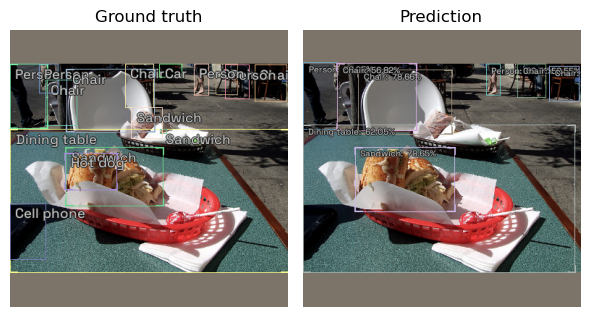

In [12]:
image_id = 40


image_size = 384
infer_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size), tfms.A.Normalize()])
infer_ds = Dataset(infer_records[image_id:image_id+1], infer_tfms)
infer_dl = model_type.infer_dl(infer_ds, batch_size=1, shuffle=False)
preds = model_type.predict_from_dl(model, infer_dl, keep_images=True)


for x in preds[0].pred.detection.components:
    if 'ScoresRecordComponent' in str(x):
        scores = x.scores
        print(scores)
    if 'InstancesLabelsRecordComponent' in str(x):
        labels = x.labels
        print(labels)
    if 'BBoxesRecordComponen' in str(x):
        bboxes = x.bboxes
        print(bboxes)
        
        
show_preds(preds=preds[0:1])

